1. Gerekli kütüphaneler

In [111]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

2. Veriyi okuma, aykırı verileri medyanla doldurma

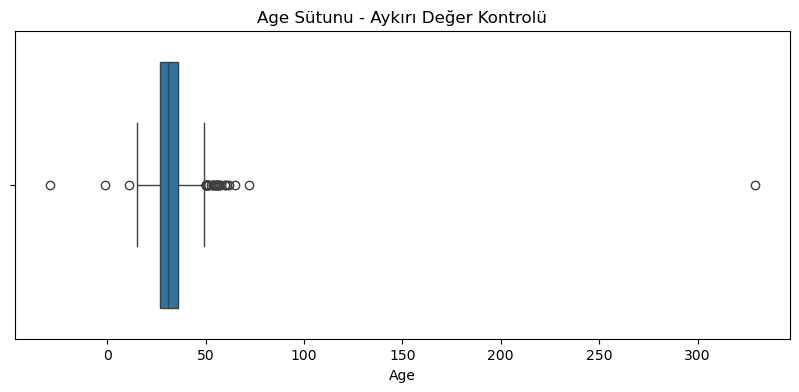

📌 Alt sınır: 13.5
📌 Üst sınır: 49.5
🚨 Aykırı değer sayısı: 36


Age
 50     6
 51     5
 56     4
 54     3
 55     3
 57     3
 60     2
 53     1
-1      1
 11     1
 61     1
 58     1
 65     1
 62     1
-29     1
 329    1
 72     1
Name: count, dtype: int64

In [112]:
# Veri setini yükle
df = pd.read_csv("survey.csv")

# Age sütununu görselleştir
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["Age"])
plt.title("Age Sütunu - Aykırı Değer Kontrolü")
plt.show()

# Aykırı değer sınırlarını hesapla
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("📌 Alt sınır:", lower_bound)
print("📌 Üst sınır:", upper_bound)

# Aykırı değerleri tespit et
outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)]
print(f"🚨 Aykırı değer sayısı: {outliers.shape[0]}")
outliers["Age"].value_counts()

✅ Medyan yaş: 31.0


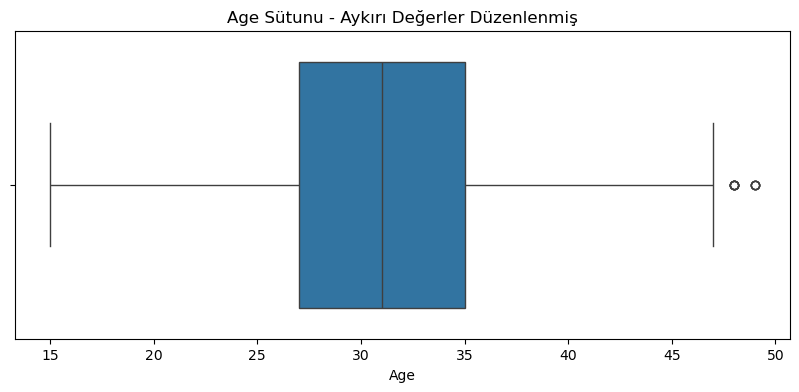

In [113]:
# Medyan değeri hesapla
median_age = df["Age"].median()
print("✅ Medyan yaş:", median_age)

# Aykırı değerleri medyanla değiştir
df["Age"] = df["Age"].apply(lambda x: median_age if (x < lower_bound or x > upper_bound) else x)

# Kontrol edelim
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["Age"])
plt.title("Age Sütunu - Aykırı Değerler Düzenlenmiş")
plt.show()

In [114]:
# Temizlenmiş veriyi kaydetmek istersen
df.to_csv("survey_cleaned.csv", index=False)
print("💾 Temizlenmiş veri 'survey_cleaned.csv' olarak kaydedildi.")

💾 Temizlenmiş veri 'survey_cleaned.csv' olarak kaydedildi.


In [115]:
# Veri yolu
file_path = "survey_cleaned.csv"

# Veriyi oku
df = pd.read_csv(file_path)

# İlk birkaç satıra göz at
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


3. Veri kontrolü

In [116]:
# Sütun bilgisi
print("🔢 Sütun Sayısı:", df.shape[1])
print("\n📋 Eksik Veri Dağılımı:")
print(df.isnull().sum().sort_values(ascending=False))

# Yaş sınırlarını da kontrol edelim
print("\n🎂 Yaş Aralığı:", df['Age'].min(), "–", df['Age'].max())

🔢 Sütun Sayısı: 27

📋 Eksik Veri Dağılımı:
comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

🎂 Yaş Aralığı: 15.0 – 49.

4. Veri temizliği

In [117]:
# 1️⃣ Gereksiz sütunları sil
df.drop(columns=["Timestamp", "comments", "state"], inplace=True)

# 2️⃣ Geçersiz yaşları filtrele
df = df[(df["Age"] >= 15) & (df["Age"] <= 80)]

# 3️⃣ Son kontrol
print("🧹 Yeni veri şekli:", df.shape)

🧹 Yeni veri şekli: (1259, 24)


5. Eksik veri doldurma

In [118]:
# 1️⃣ 'self_employed' sütunu (çoğunlukla 'No' olduğu varsayımı)
df["self_employed"].fillna("No", inplace=True)

# 2️⃣ 'work_interfere' sütunu için eksik değerleri 'Don’t know' ile doldur
df["work_interfere"].fillna("Don’t know", inplace=True)

# Kontrol
print("✅ Kalan eksik değer sayısı:", df.isnull().sum().sum())

✅ Kalan eksik değer sayısı: 0


/var/folders/dm/hckhrzb5207cp2xy2c6ts38c0000gn/T/ipykernel_32495/988773537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["self_employed"].fillna("No", inplace=True)
/var/folders/dm/hckhrzb5207cp2xy2c6ts38c0000gn/T/ipykernel_32495/988773537.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

6. Encoding

In [119]:
# Hedef değişkeni ayır
y = df["treatment"]

# Geri kalanları özellik olarak al
X = df.drop("treatment", axis=1)

# Encoder'ları saklamak için sözlük oluştur
encoders = {}

# Tüm kategorik sütunları LabelEncoder ile encode et
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le  # Her sütunun encoder'ını sakla

# Hedef değişkeni de encode et (gerekirse)
le_target = LabelEncoder()
y = le_target.fit_transform(y)
encoders["treatment"] = le_target  # Opsiyonel, hedefi de kaydetmek istersen

# Kontrol
print("✅ X şekli:", X.shape)
print("✅ y sınıfları:", np.unique(y))

✅ X şekli: (1259, 23)
✅ y sınıfları: [0 1]


In [120]:
joblib.dump(encoders, "../deployment/mental_encoders.pkl")
print("✅ Tüm encoder'lar mental_encoders.pkl dosyasına kaydedildi.")

✅ Tüm encoder'lar mental_encoders.pkl dosyasına kaydedildi.


7. Train ve test olarak ayırma

In [121]:
# 1️⃣ Eğitim/Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 2️⃣ StandardScaler ile ölçekle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kontrol
print("✅ Eğitim şekli:", X_train_scaled.shape)
print("✅ Test şekli:", X_test_scaled.shape)

✅ Eğitim şekli: (1007, 23)
✅ Test şekli: (252, 23)


8. Ön işlenmiş setlerini kaydetme

In [122]:
# Pandas DataFrame'e geri dönüştür
train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
train_df["treatment"] = y_train

test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
test_df["treatment"] = y_test

# CSV olarak kaydet
train_df.to_csv("normal/train_mental.csv", index=False)
test_df.to_csv("normal/test_mental.csv", index=False)

print("✅ Veriler başarıyla kaydedildi.")

✅ Veriler başarıyla kaydedildi.


/var/folders/dm/hckhrzb5207cp2xy2c6ts38c0000gn/T/ipykernel_32495/2450949328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="treatment", data=df, palette="Set2")


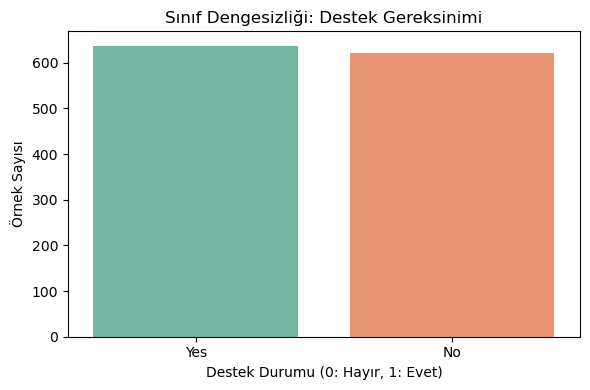

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sınıf dengesizliğini görselleştirme
plt.figure(figsize=(6, 4))
sns.countplot(x="treatment", data=df, palette="Set2")
plt.title("Sınıf Dengesizliği: Destek Gereksinimi")
plt.xlabel("Destek Durumu (0: Hayır, 1: Evet)")
plt.ylabel("Örnek Sayısı")
plt.tight_layout()
plt.show()